<a href="https://colab.research.google.com/github/gmanojkumar402-max/Manoj-colab-notebooks/blob/main/1D_simple_ridge_regression_from_scratch_m_and_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [23]:
X,y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, noise = 20, random_state = 42)

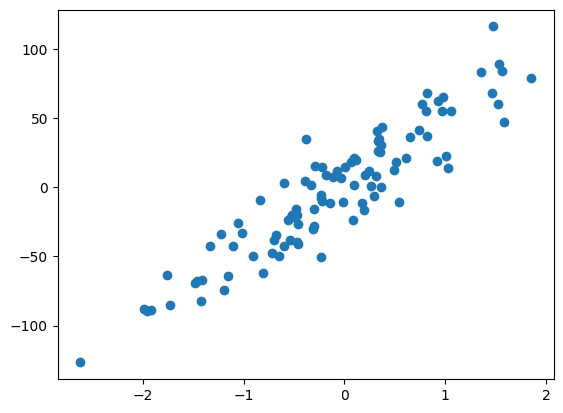

In [24]:
plt.scatter(X,y)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X,y)

LinearRegression()

In [27]:
lr.coef_

array([47.13323967])

In [28]:
lr.intercept_

np.float64(2.3302306410539453)

In [29]:
from sklearn.linear_model import Ridge

In [30]:
r = Ridge(alpha = 10)
r.fit(X,y)

Ridge(alpha=10)

In [31]:
r.coef_

array([41.9906212])

In [32]:
r.intercept_

np.float64(1.7961876226164746)

Let's take alpha value as 100. we can see a drastical decrease of value m

In [33]:
r1 = Ridge(alpha = 100)
r1.fit(X,y)

Ridge(alpha=100)

In [34]:
r1.coef_

array([21.18627364])

In [35]:
r1.intercept_

np.float64(-0.3642714175995887)

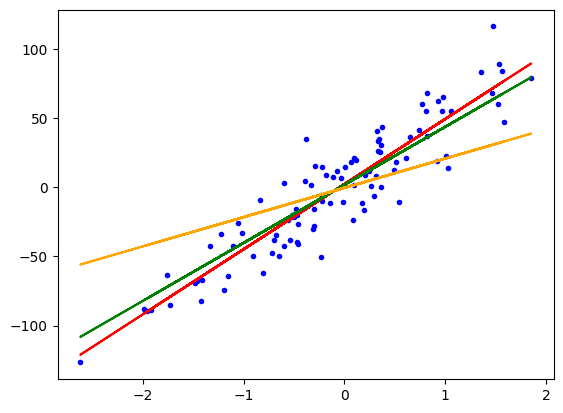

In [40]:
plt.plot(X,y,'b.')
plt.plot(X, lr.predict(X), color = 'red', label = 'alpha = 0')
plt.plot(X,r.predict(X), color = 'green', label = 'alpha = 10')
plt.plot(X,r1.predict(X), color = 'orange', label = 'alpha = 100')

Let's create our own class

In [52]:
class MKGRidge:
  def __init__(self, alpha = 0.1):
    self.alpha = alpha
    self.m = None
    self.b = None
  def fit(self, X_train, y_train):
    # using the ridge regression formula we have to calculate value of m
    # lets calculate numerator and denominator differently
    num = 0
    den = 0
    #lets run the loop to find the summation
    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean()))
      den = den + ((X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean()))
    self.m = num/(den + self.alpha)
    # lets calculate value of b
    self.b = y_train.mean() - (self.m * X_train.mean())
    print(self.m)
    print(self.b)
  def predict(self, X_test):
    pass





In [53]:
reg = MKGRidge(alpha = 10)

In [54]:
reg.fit(X,y)

[41.9906212]
[1.79618762]
